In [1]:
import pandas as pd 
from ucimlrepo import fetch_ucirepo

#fetching the dataset 
census_income = fetch_ucirepo(id=20)
features = census_income.data.features
target = census_income.data.targets

#combing the dataset into a single DataFrame
df = pd.DataFrame(features.join(target))

#saving the dataframe in the local drive
df.to_csv("data/census_income.csv",index=False)

#display the head
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
#checking for the duplicates  
df.duplicated().sum()

np.int64(29)

In [5]:
## removing the duplicates 
df.drop_duplicates(keep="first",inplace=True)

In [6]:
#checking for null values 
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [7]:
col_to_operate = ["workclass","occupation","native-country","income"]

for col in col_to_operate:
    print(f"Checking for the unique vlaues: {df[col].unique()}")
    print("\n")
    print(f"Checking for the value counts: {df[col].value_counts()}")


Checking for the unique vlaues: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


Checking for the value counts: workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
Checking for the unique vlaues: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]


Checking for the value counts: occupation
Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-clean

In [8]:
import numpy as np

char_to_remove = ["?"," ?","Holand-Netherlands"]

for char in char_to_remove:
    for col in col_to_operate:
        if col == "income":
            df[col] = df[col].str.replace(".","")
        else:
            df[col] = df[col].replace(char,np.nan)

In [9]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [10]:
#filling the nan values 
for col in col_to_operate:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

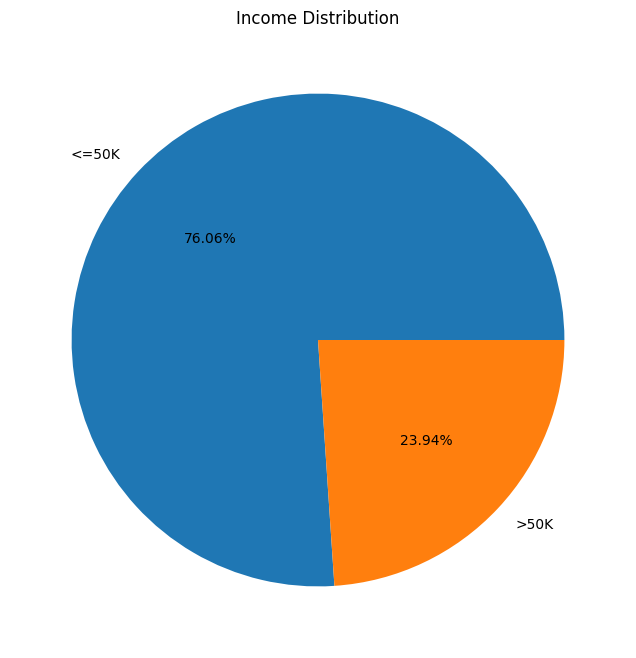

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

income = df["income"].value_counts()

plt.figure(figsize=(8,8))
plt.title("Income Distribution")
plt.pie(income,labels=income.index,autopct="%1.2f%%")
plt.show()
plt.tight_layout()

## 76% of the population that is working is earning less than 50K

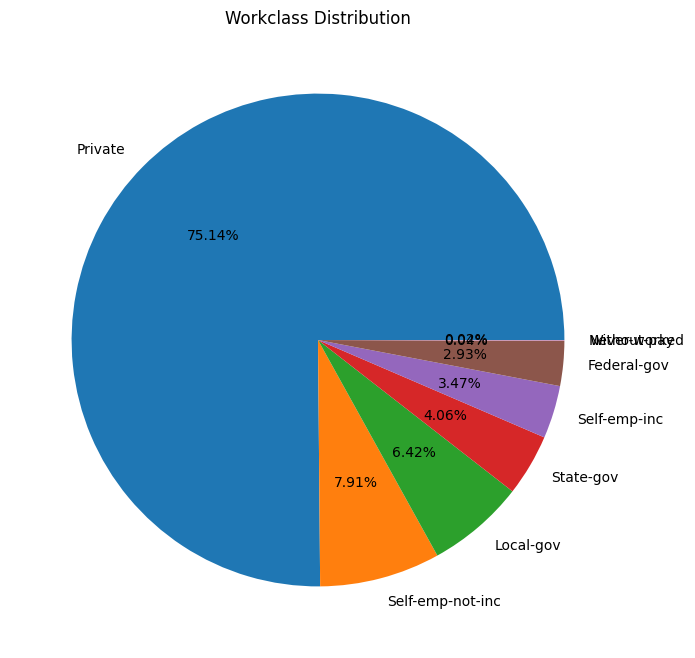

<Figure size 640x480 with 0 Axes>

In [13]:
workclass = df["workclass"].value_counts()

plt.figure(figsize=(8,8))
plt.title("Workclass Distribution")
plt.pie(workclass,labels=workclass.index,autopct="%1.2f%%")
plt.show()
plt.tight_layout()

## 75% of the poputlation working are working in a private firm. 

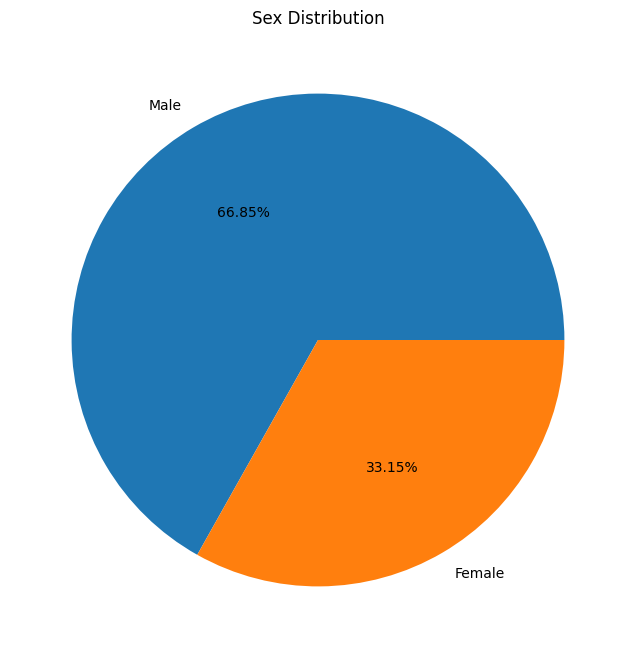

<Figure size 640x480 with 0 Axes>

In [14]:
sex = df["sex"].value_counts()

plt.figure(figsize=(8,8))
plt.title("Sex Distribution")
plt.pie(sex,labels=sex.index,autopct="%1.2f%%")
plt.show()
plt.tight_layout()

## 66% of the population working are male and rest female. 

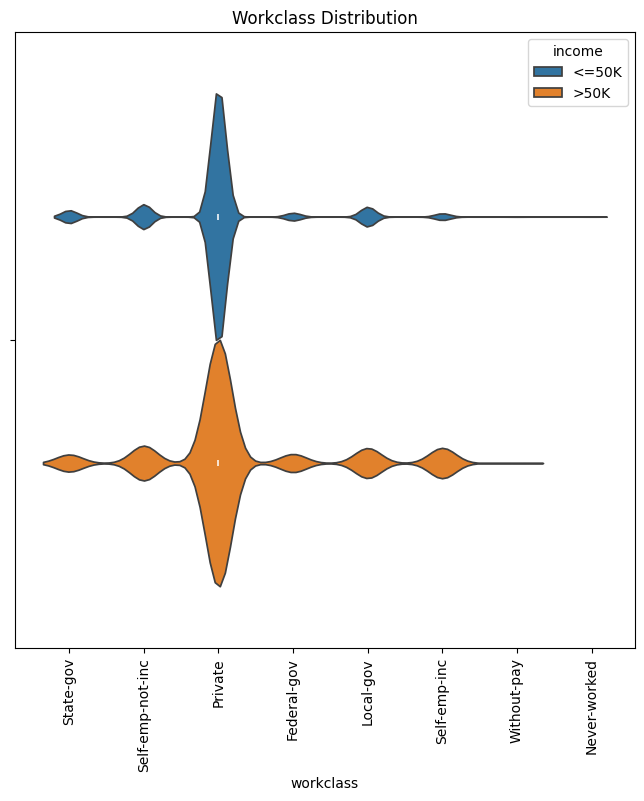

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(8,8))
plt.title("Workclass Distribution")
sns.violinplot(data=df,x="workclass",hue="income")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

## People working in a private firm is earning more than anyother workclass. 

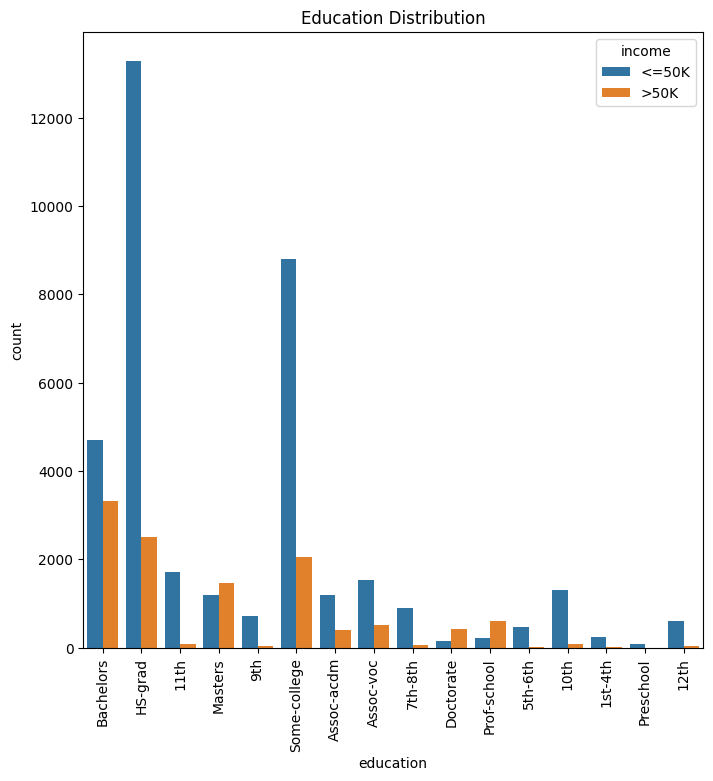

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(8,8))
plt.title("Education Distribution")
sns.countplot(data=df,x="education",hue="income")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

## Higher the education and higher the income. 
## Bachelor and HS_grad have higher number of people earning more than 50K

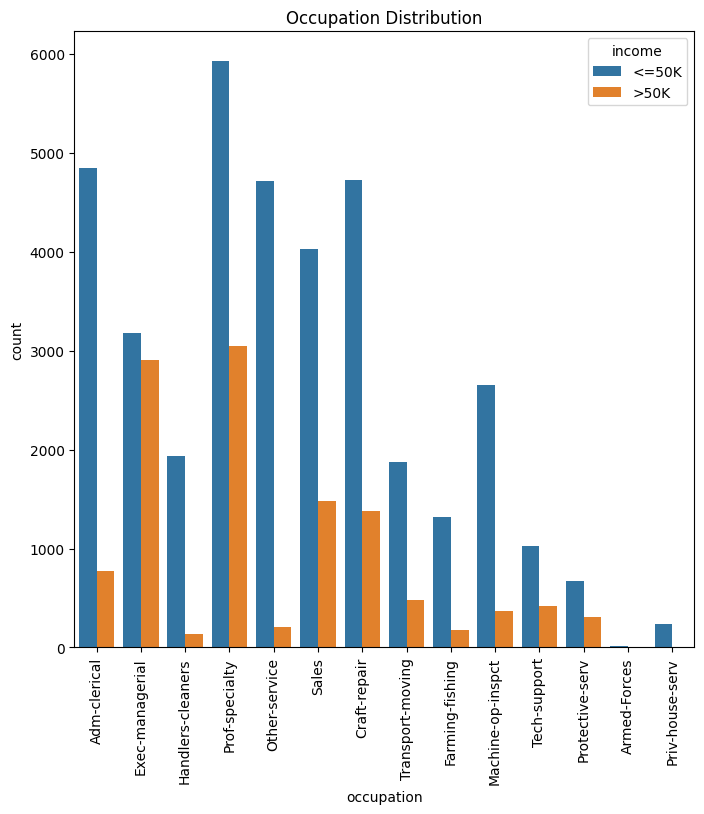

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(8,8))
plt.title("Occupation Distribution")
sns.countplot(data=df,x="occupation",hue="income")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

## People working are Exec-managerial and Prof-speciality has higher chance for earning more than 50K. 

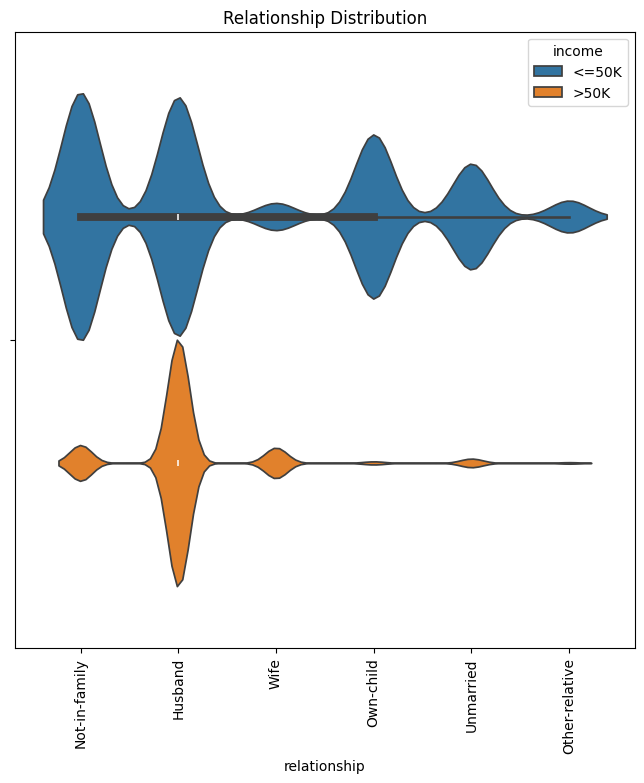

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(8,8))
plt.title("Relationship Distribution")
sns.violinplot(data=df,x="relationship",hue="income")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

## Husband's in the family is earning more than anyother family member and has a higher potential of earning more than 50K. 

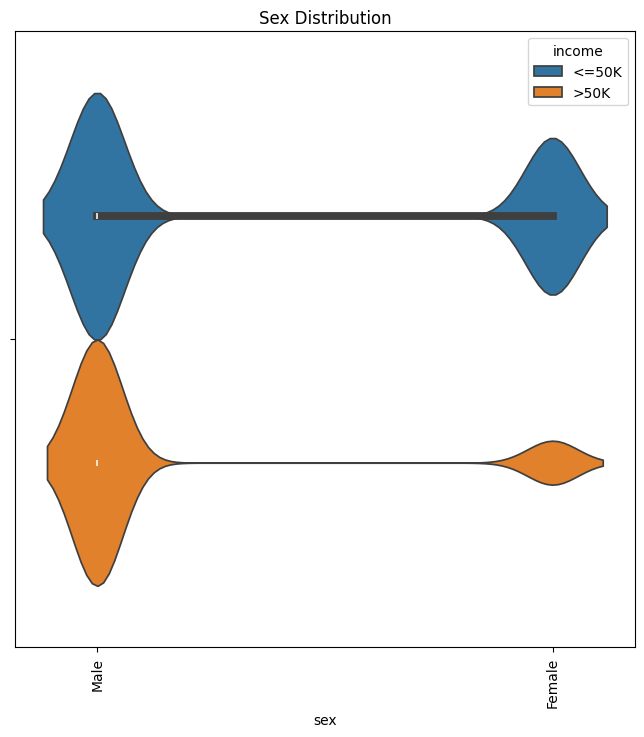

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(8,8))
plt.title("Sex Distribution")
sns.violinplot(data=df,x="sex",hue="income")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

## Male has higher potential for earning more than 50K 

In [20]:
income_map = {'<=50K':0,'>50K':1}
df["income"] = df["income"].map(income_map)
df["income"].unique()

array([0, 1])

In [21]:
#segregating numerical and categorical columns 
numerical_columns = df.select_dtypes(exclude="O").columns
categorical_columns = df.select_dtypes(include="O").columns

print("Numerical Columns: ",numerical_columns)
print("\n")
print("Categorical Columns: ",categorical_columns)

Numerical Columns:  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')


Categorical Columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


<Axes: >

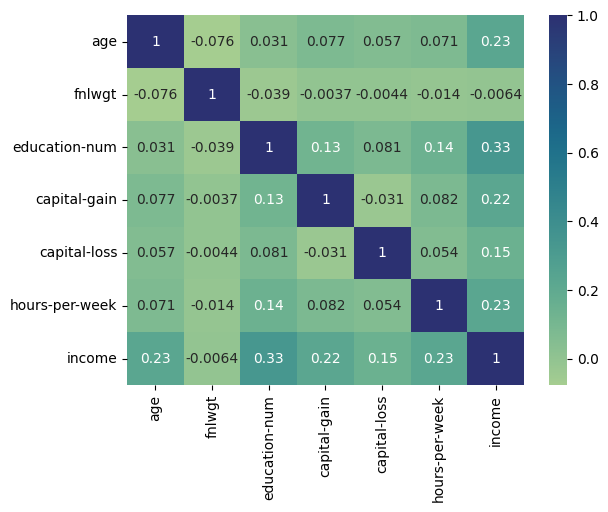

In [22]:
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix,annot=True,cmap="crest")

In [23]:
#removing unwanted columns
drop_columns = ["fnlwgt","native-country","education-num"]
df.drop(drop_columns,axis=1,inplace=True)

#display the head 
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0


In [24]:
df["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)